In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
from category_encoders import BinaryEncoder
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    LogisticRegression,
    SGDClassifier,
    BayesianRidge,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.svm import LinearSVC
from numpy.ma.core import sqrt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import StratifiedShuffleSplit 
import category_encoders as ce

In [2]:
df = pd.read_csv('./student_survey.csv')

In [3]:
print(df.columns)

Index(['location', 'gender', 'cgpa', 'board', 'sgpa_5', 'score_stats',
       'att_stats', 'focus_stats', 'score_maths', 'att_maths', 'focus_maths',
       'score_cs', 'att_cs', 'focus_cs'],
      dtype='object')


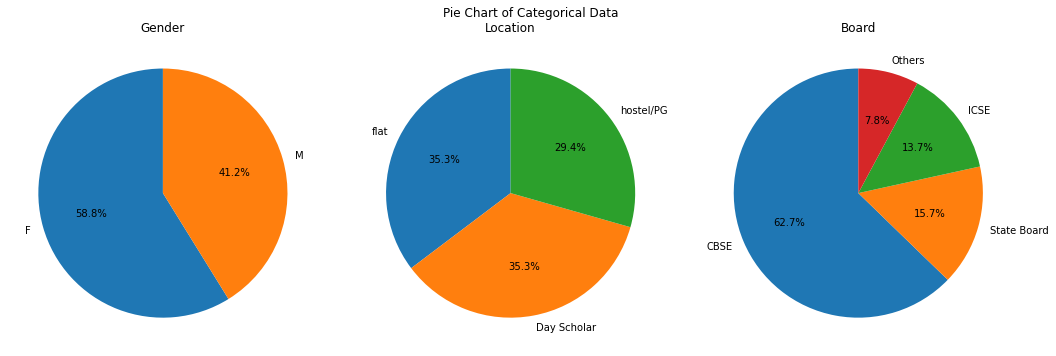

In [4]:
gender = df['gender'].value_counts()
location = df['location'].value_counts()
board = df['board'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Gender')

axs[1].pie(location, labels=location.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Location')

axs[2].pie(board, labels=board.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Board')

fig.suptitle('Pie Chart of Categorical Data')

plt.tight_layout()
plt.show()

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))

['location', 'gender', 'board']
3


In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))

['cgpa', 'sgpa_5', 'score_stats', 'att_stats', 'focus_stats', 'score_maths', 'att_maths', 'focus_maths', 'score_cs', 'att_cs', 'focus_cs']
11


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,51.0,7.432353,0.592849,5.38,7.20,7.5,7.845,8.4
sgpa_5,51.0,7.561569,0.656090,5.75,7.16,7.8,8.000,8.5
score_stats,51.0,51.392157,6.163857,30.00,49.00,52.0,55.500,60.0
att_stats,51.0,86.470588,6.688357,75.00,80.00,89.0,92.000,100.0
focus_stats,51.0,4.215686,2.484462,1.00,2.00,3.0,6.000,10.0
score_maths,51.0,47.147059,10.615222,11.00,40.00,50.0,54.500,60.0
att_maths,51.0,86.078431,6.743421,75.00,80.50,88.0,91.500,100.0
focus_maths,51.0,3.960784,2.366100,1.00,2.00,3.0,6.000,9.0
score_cs,51.0,45.294118,8.996208,5.00,40.50,46.0,51.500,58.0
att_cs,51.0,85.313725,7.524600,75.00,78.50,87.0,90.000,100.0


In [8]:
df.describe(include='object')

,location,gender,board
count,51,51,51
unique,3,2,4
top,flat,F,CBSE
freq,18,30,32


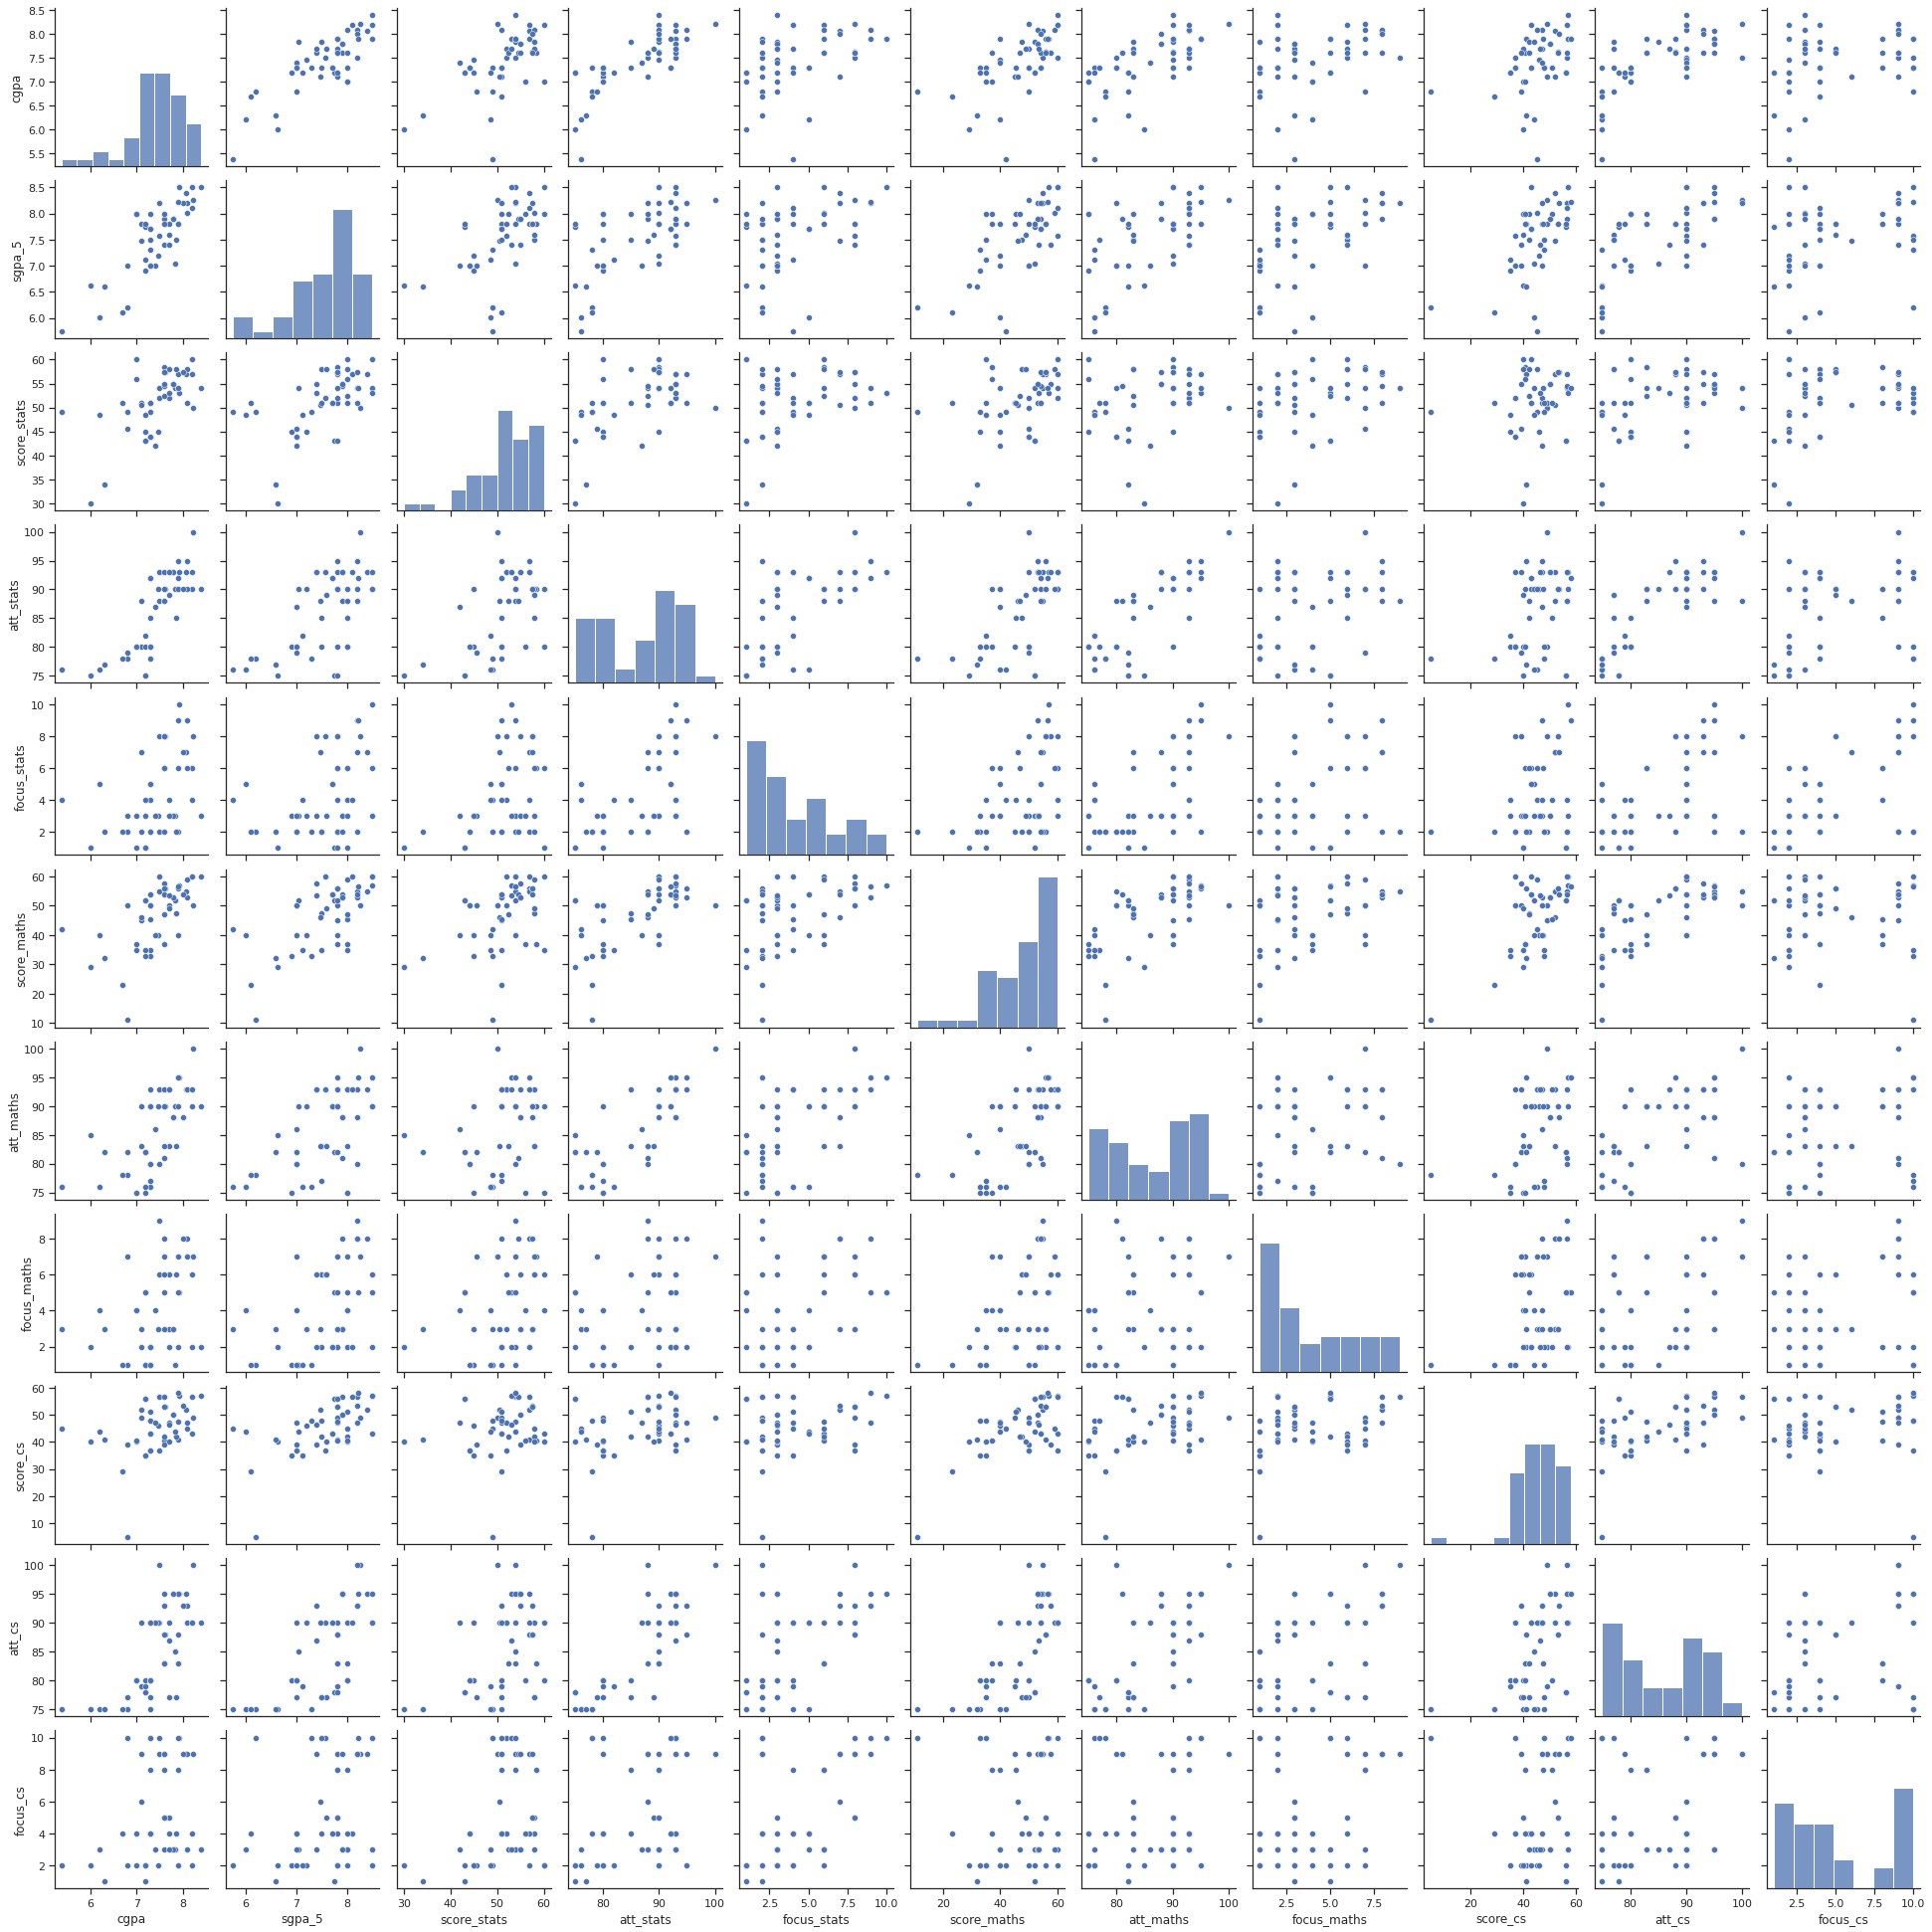

In [9]:
#plt.figure(figsize=(6, 4))
sns.set_theme(style="ticks")
sns.pairplot(df)

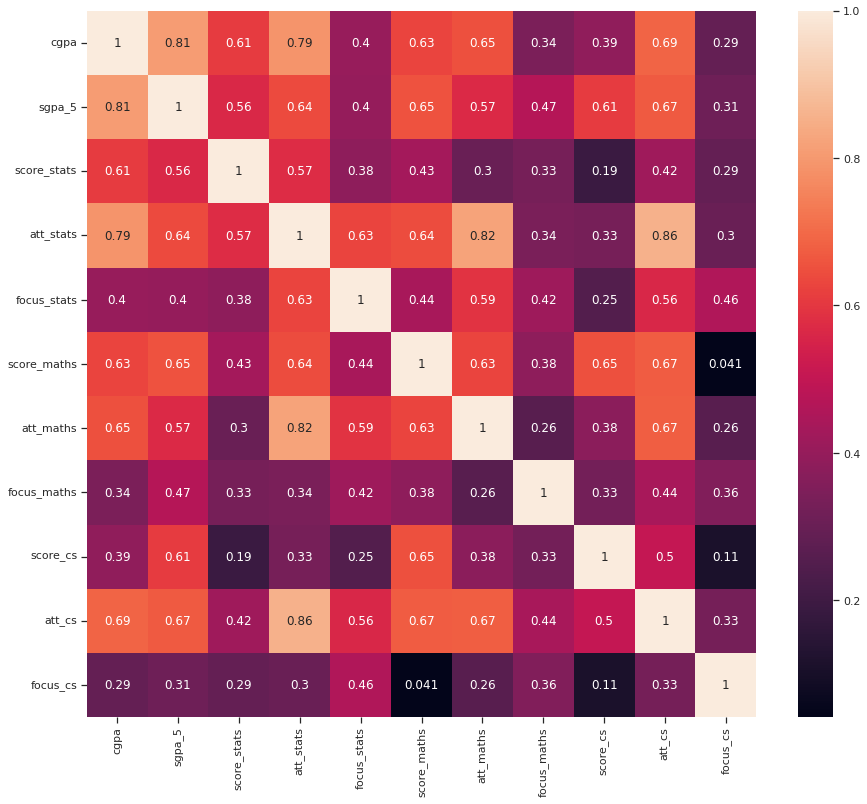

In [10]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 13))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

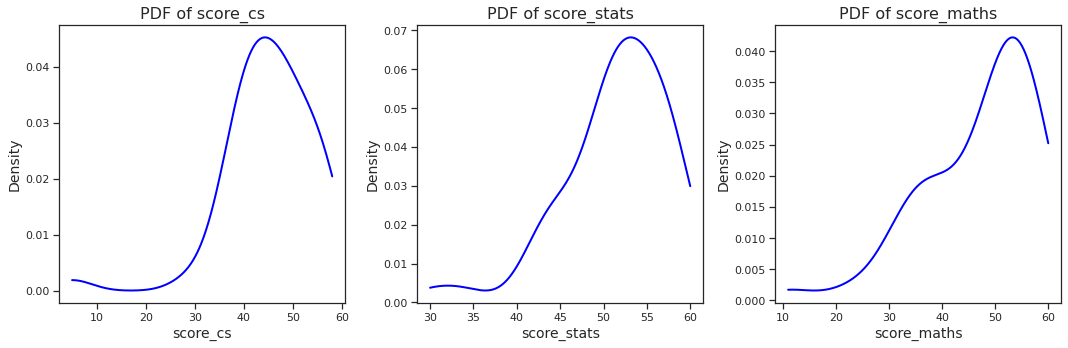

In [11]:
score_cs = df['score_cs'].dropna()
score_stats = df['score_stats'].dropna()
score_maths = df['score_maths'].dropna()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each column and plot KDE on a separate subplot
for i, score_data in enumerate([score_cs, score_stats, score_maths]):
    # Estimate the kernel density function
    kde = gaussian_kde(score_data)
    
    # Generate x values for plotting
    x_values = np.linspace(score_data.min(), score_data.max(), 1000)
    
    # Plot the PDF as a line graph
    axs[i].plot(x_values, kde(x_values), color='blue', linewidth=2)
    axs[i].set_title(f'PDF of {score_data.name}', fontsize=16)
    axs[i].set_xlabel(score_data.name, fontsize=14)
    axs[i].set_ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()

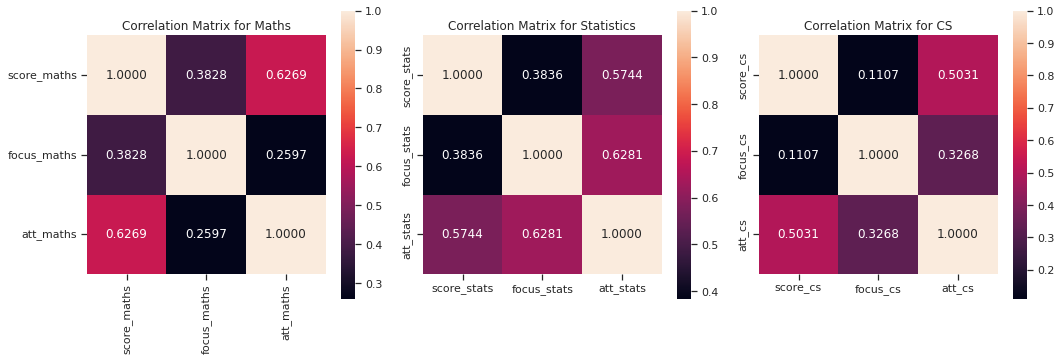

In [12]:
maths_columns = ['score_maths', 'focus_maths', 'att_maths']
cs_columns = ['score_cs', 'focus_cs', 'att_cs']
stats_columns = ['score_stats', 'focus_stats', 'att_stats']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Correlation matrix for maths columns
correlation_df_maths = df[maths_columns]
correlation_matrix_maths = correlation_df_maths.corr()
sns.heatmap(correlation_matrix_maths, ax=axs[0], annot=True, fmt=".4f", square=True)
axs[0].set_title('Correlation Matrix for Maths')

# Correlation matrix for stats columns
correlation_df_stats = df[stats_columns]
correlation_matrix_stats = correlation_df_stats.corr()
sns.heatmap(correlation_matrix_stats, ax=axs[1], annot=True, fmt=".4f", square=True)
axs[1].set_title('Correlation Matrix for Statistics')

# Correlation matrix for cs columns
correlation_df_cs = df[cs_columns]
correlation_matrix_cs = correlation_df_cs.corr()
sns.heatmap(correlation_matrix_cs, ax=axs[2], annot=True, fmt=".4f", square=True)
axs[2].set_title('Correlation Matrix for CS')

plt.tight_layout()
plt.show()

In [13]:
# Function for iterating over multiple models
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=45)

    model1 = LinearRegression()
    model2 = BayesianRidge()
    model3 = RandomForestRegressor()
    model4 = GradientBoostingRegressor()
    model5 = DecisionTreeRegressor()
    model6 = Ridge()
    model7 = Lasso(tol=0.001)

    models = [model1, model2, model3, model4, model5, model6, model7 ]
    model_name_list = ['LinearRegression', 'BayesianRidge', 'RandomForestRegressor', 'GradientBoostingRegressor',
           'DecisionTreeRegressor', 'Ridge', 'Lasso']

    # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by cross validation', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        model.fit(X_train, y_train)

        y_test_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, rmse_cross_val ,mse,r_squared ]

    return results

In [14]:
df_cgpa = df[['score_stats', 'att_stats', 'focus_stats', 'score_maths', 'att_maths', 'focus_maths', 'score_cs', 'att_cs', 'focus_cs']]

y = df['cgpa'] #Target
x = df_cgpa #DataFrame with features

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=15)

train_regression_model(x, y)

,MAE,RMSE,RMSE by cross validation,MSE,R^2
LinearRegression,0.241228,0.267527,1.552458,0.071571,0.497751
BayesianRidge,0.169278,0.206732,0.262722,0.042738,0.700083
RandomForestRegressor,0.13355,0.143473,0.372553,0.020584,0.855548
GradientBoostingRegressor,0.143997,0.168031,0.313204,0.028234,0.801864
DecisionTreeRegressor,0.205,0.238362,0.426615,0.056817,0.601287
Ridge,0.240776,0.266725,0.263412,0.071142,0.500757
Lasso,0.092559,0.111753,0.388945,0.012489,0.91236


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=45)

best_model1 = Lasso()
best_model1.fit(x_train, y_train)

y_test_pred = best_model1.predict(x_test)

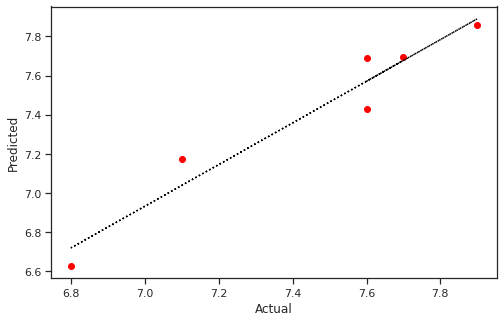

In [16]:
# Convert Pandas Series to NumPy arrays
y_test_np = np.array(y_test)
y_test_pred_np = np.array(y_test_pred)

# Perform polynomial fitting
m, n = np.polyfit(y_test_np, y_test_pred_np, 1)

# Plotting
plt.figure(figsize=(8,5))
plt.scatter(x=y_test_np, y=y_test_pred_np, c="red")
plt.plot(y_test_np, m*y_test_np + n, ':', c="black")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [17]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['board', 'gender', 'location'])
df_encoded = encoder.fit_transform(df)
df_encoded.head()

,location_0,location_1,gender_0,gender_1,cgpa,board_0,board_1,board_2,sgpa_5,score_stats,att_stats,focus_stats,score_maths,att_maths,focus_maths,score_cs,att_cs,focus_cs
0,0,1,0,1,8.21,0,0,1,8.26,50.0,100,8,50.0,100,7,49.0,100,9
1,0,1,1,0,5.38,0,0,1,5.75,49.0,76,4,42.0,76,3,45.0,75,2
2,1,0,1,0,7.90,0,1,0,7.80,57.0,95,2,56.0,95,2,41.0,88,2
3,0,1,0,1,8.20,0,0,1,8.50,60.0,90,6,60.0,90,6,43.0,90,2
4,1,1,1,0,7.50,0,0,1,8.20,54.0,88,2,55.0,80,9,56.5,100,9


In [18]:
THRESHOLD = 0.12
cgpa_corr = df_encoded.corr()["cgpa"]

In [19]:
df_encoded_features = df_encoded.copy()

In [20]:
for key, value in cgpa_corr.items():
    if abs(value) < THRESHOLD:
        df_encoded_features.drop(columns= key, inplace=True)

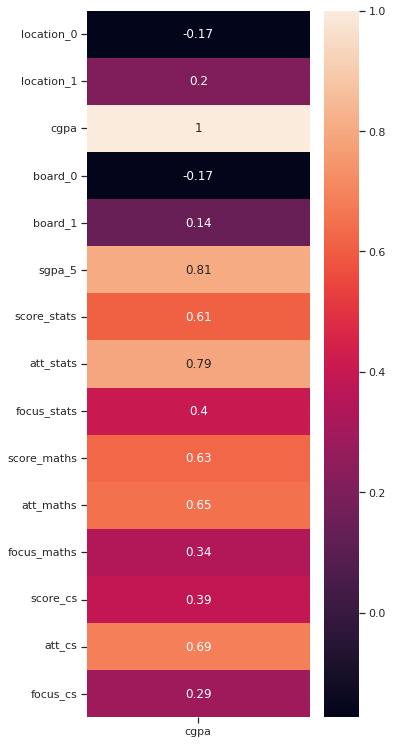

In [21]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_encoded_features.corr()

# Extract the correlation values for the 'cgpa' column
correlation_with_cgpa = correlation_matrix['cgpa']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_cgpa.to_frame(), annot=True, cbar=True)
plt.show()

In [22]:
X = df_encoded_features.drop('cgpa',axis = 1)
Y = df_encoded_features['cgpa']

In [23]:
X_features = df_encoded.drop('cgpa',axis = 1)
Y_cgpa = df_encoded ['cgpa']

In [27]:
train_regression_model(X_features, Y_cgpa)

,MAE,RMSE,RMSE by cross validation,MSE,R^2
LinearRegression,0.24738,0.275328,1.603746,0.075805,0.468033
BayesianRidge,0.17023,0.206927,0.26359,0.042819,0.699517
RandomForestRegressor,0.2042,0.221305,0.358432,0.048976,0.656309
GradientBoostingRegressor,0.179092,0.194244,0.233765,0.037731,0.735223
DecisionTreeRegressor,0.15,0.170196,0.460435,0.028967,0.796725
Ridge,0.239777,0.269983,0.264262,0.072891,0.488485
Lasso,0.092559,0.111753,0.388945,0.012489,0.91236


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_cgpa, test_size=0.1, shuffle=True, random_state=42)

best_model_features = Lasso()
best_model_features.fit(X_train, y_train)

Y_test_pred2 = best_model_features.predict(X_test)

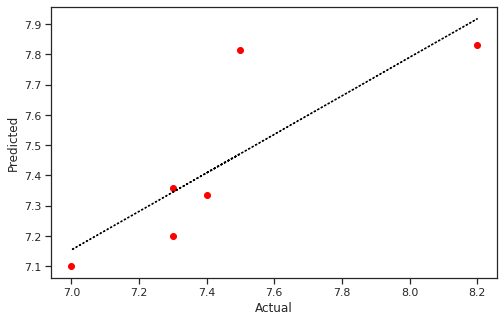

In [29]:
# Convert Pandas Series to NumPy arrays
y_test_np = np.array(y_test)
y_test_pred_np = np.array(Y_test_pred2)

# Perform polynomial fitting
m, n = np.polyfit(y_test_np, y_test_pred_np, 1)

# Plotting
plt.figure(figsize=(8,5))
plt.scatter(x=y_test_np, y=y_test_pred_np, c="red")
plt.plot(y_test_np, m*y_test_np + n, ':', c="black")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [30]:
def train_binary_classification_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LogisticRegression()
    model2 = MultinomialNB()
    model3 = BaggingClassifier()
    model4 = DecisionTreeClassifier()
    model5 = LinearSVC()
    model6 = SGDClassifier()
    model7 = KNeighborsClassifier()
    model8 = RandomForestClassifier()
    model9 = GradientBoostingClassifier()

    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9 ]
    model_name_list = ['LogisticRegression', 'MultinomialNB', 'BaggingClassifier', 'DecisionTreeClassifier',
           'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']

    # Dataframe for results
    results = pd.DataFrame(columns=["Test Accuracy", "Train Accuracy"], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracy_train = accuracy_score(y_train, y_train_pred)



        model_name = model_name_list[i]
        results.loc[model_name, :] = [accuracy, accuracy_train ]

    return results

In [31]:
train_binary_classification_model(X_features,Y_cgpa)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.